In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

In [8]:
energy_data, temperature_data, stations_data = pd.read_pickle("../Data/CleanedData.pickle")
data = pd.read_pickle("../Data/Data.pickle")

# Statistics
## Descriptive Statistics
Note that specific columns have been chosen, as in some cases descriptive statistics may be misleading (i.e. for categorical variables).
The choices have been made purely by human judgement.

In [9]:
energy_data[["TotalDemand", "RRP"]].describe()
temperature_data.describe()
stations_data[["StationHeight", "BarometerHeight", "CompletionPercent"]].describe()

,TotalDemand,RRP
count,1.658965e+06,1.658965e+06
mean,4.619879e+03,5.142330e+01
std,2.848202e+03,1.912126e+02
min,2.189000e+01,-1.000000e+03
25%,1.414270e+03,2.334000e+01
50%,5.131463e+03,3.441000e+01
75%,6.591495e+03,5.487000e+01
max,1.457986e+04,1.470000e+04


,StationNumber,Precipitation,AirTemperature,WetBulbTemperature,DewTemperature,RelativeHumidity,WindSpeed,WindDirection,WindgustSpeed,SeaPressure,StationPressure
count,1.826244e+06,1.406362e+06,1.014593e+06,1.805564e+06,1.140835e+06,1.140832e+06,852918.000000,1.036750e+06,1.089933e+06,1.574715e+06,1.805909e+06
mean,6.297429e+04,1.041248e+00,1.677426e+01,1.317785e+01,9.110140e+00,6.420346e+01,11.629759,1.903881e+02,1.936450e+01,1.016152e+03,1.011931e+03
std,2.686676e+04,4.703112e+00,6.243056e+00,4.676769e+00,5.478454e+00,1.900003e+01,8.852645,1.161376e+02,1.302222e+01,7.868127e+00,8.247630e+00
min,2.309000e+04,0.000000e+00,-1.940000e+01,-9.000000e-01,-3.920000e+01,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.749000e+02,9.688000e+02
25%,4.091300e+04,0.000000e+00,1.220000e+01,9.600000e+00,5.100000e+00,5.100000e+01,5.400000,8.000000e+01,1.120000e+01,1.011400e+03,1.007100e+03
50%,6.606200e+04,0.000000e+00,1.610000e+01,1.280000e+01,8.600000e+00,6.500000e+01,9.400000,2.100000e+02,1.660000e+01,1.016600e+03,1.012700e+03
75%,8.633800e+04,2.000000e-01,2.090000e+01,1.660000e+01,1.280000e+01,7.900000e+01,16.600000,2.900000e+02,2.590000e+01,1.021500e+03,1.017600e+03
max,9.402900e+04,1.826000e+02,5.120000e+01,4.100000e+01,4.100000e+01,1.230000e+02,87.100000,3.600000e+02,1.278000e+02,1.041800e+03,1.037600e+03


,StationHeight,BarometerHeight,CompletionPercent
count,6.000000,6.000000,6.000000
mean,30.716667,31.766667,101.833333
std,19.023503,19.830549,4.308906
min,7.500000,7.500000,99.000000
25%,13.875000,14.275000,99.000000
50%,35.100000,36.200000,100.000000
75%,45.750000,48.300000,102.500000
max,50.500000,51.400000,110.000000


# Graphs 
## Null data
Graph out variables with a relatively large amount of null data.
We here are looking for large gaps, as data in these sections can't just be *filled in*!
The wind data tends to have these large gaps, which meaning that these columns should likely be removed.
In the opposite situation where there are the occasional missing value, it should be safe to interpolate their values (note that this is because the missing values *don't occur on a regular basis*, the data may have needed to be down sampled).

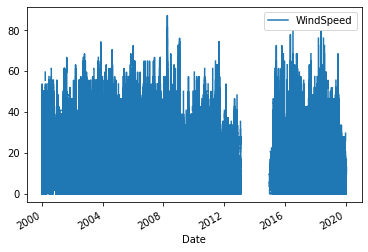

In [10]:
temperature_data.plot(x="Date", y="WindSpeed")

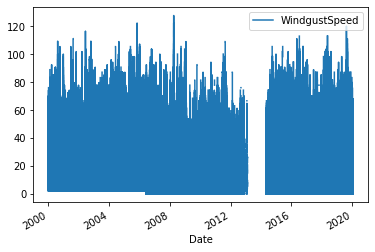

In [11]:
temperature_data.plot(x="Date", y="WindgustSpeed")

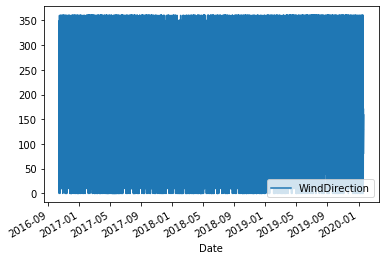

In [12]:
temperature_data.tail(62000).plot(x="Date", y="WindDirection")

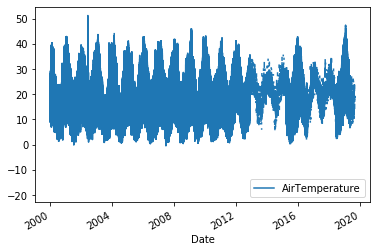

In [13]:
temperature_data.plot(x="Date", y="AirTemperature")

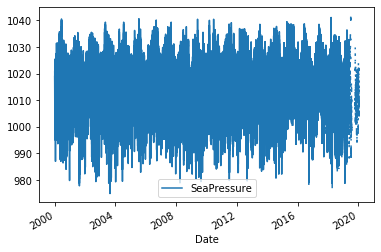

In [14]:
temperature_data.plot(x="Date", y="SeaPressure")

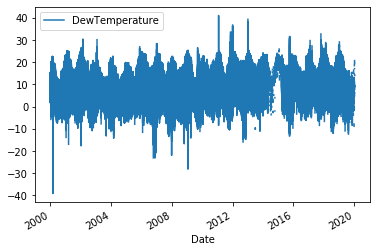

In [15]:
temperature_data.plot(x="Date", y="DewTemperature")

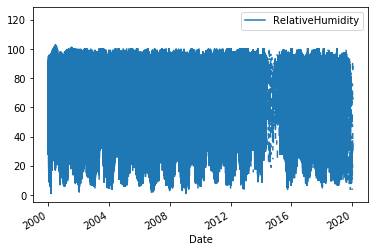

In [16]:
temperature_data.plot(x="Date", y="RelativeHumidity")

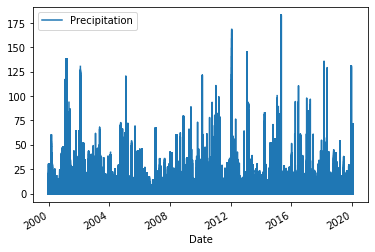

In [17]:
temperature_data.plot(x="Date", y="Precipitation")

## Date vs Total Demand   
A graphical representation of date vs total demand of energy. This information is quite useful as it shows which times of the year you'd expect to see a high demand for energy.

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'TotalDemand')

(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

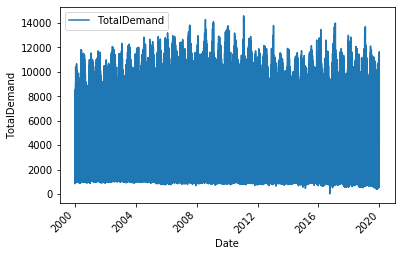

In [18]:
plt.figure()
ax = energy_data.plot(x='Date',y='TotalDemand')
plt.xlabel('Date')
plt.ylabel('TotalDemand')
plt.xticks(rotation=45)
plt.show()

## Air vs Sea and Station Pressure
A graphical representation of air vs sea and station pressure. The comparison between air temperature and pressure over a number of years can be helpful in predicting certain weather patterns as pressure plays a role in the determining the temperature.

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Hectopascals (Hpa)')

(0, 1500)

Text(0.5, 0, 'Date and Time')

(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]),
 <a list of 8 Text xticklabel objects>)

Text(0, 0.5, 'Degrees Celsius')

(0, 60)

Text(0.5, 1.0, 'StationPressure (red), SeaPressure (blue) and AirTemperature (green) temperatures')

<Figure size 432x288 with 0 Axes>

E:\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


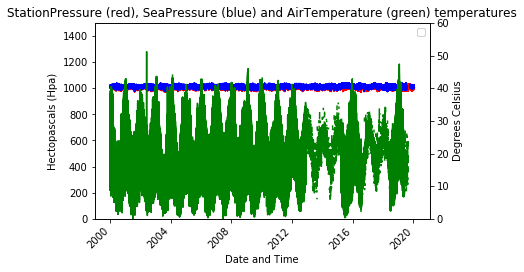

In [19]:
plt.figure()
ax = temperature_data.plot(x='Date',y='StationPressure',color='red')
temperature_data.plot(x='Date',y='SeaPressure',ax=ax,color='blue')
plt.ylabel('Hectopascals (Hpa)')
plt.ylim(0,1500)
plt.xlabel('Date and Time')
plt.xticks(rotation=45)
plt.legend('')

ax2 = ax.twinx()
temperature_data.plot(x='Date',y='AirTemperature',ax=ax2,color='green',legend='None')
plt.ylabel('Degrees Celsius')
plt.ylim(0,60)
plt.legend('')
plt.title('StationPressure (red), SeaPressure (blue) and AirTemperature (green) temperatures')
plt.show()

## Yearly variations affecting temperature and energy demand

In total demand, through the image we can see that from January to April the energy gradually shows a downward trend, after April the energy gradually rises, and after reaching its peak in June, it gradually falls again in 2006.

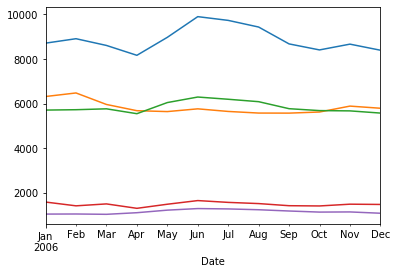

In [44]:
data.groupby("Region").resample("M").mean()["TotalDemand"]["NSW"]["2006"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["QLD"]["2006"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["VIC"]["2006"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["SA"]["2006"].plot()
data.groupby("Region").resample("M").mean()["TotalDemand"]["TAS"]["2006"].plot()

This graph shows that the total demand vs the sea pressure in 2017.
The total demand are blue lines, and the sea pressure are yellow lines.
Total demand rises with sea pressure's rise.Basically, they're in positive proportion to each other.
Between June and August, the data fluctuated more significantly. 
In most cases, total demand peaks with the increase in sea pressure.

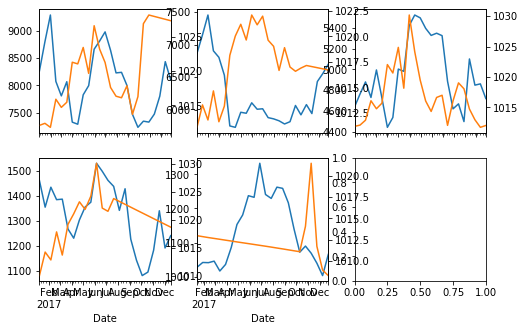

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

data.groupby("Region").resample("15D").mean()["TotalDemand"]["NSW"]["2017"].plot(ax=axes[0,0])
data.groupby("Region").resample("15D").mean()["SeaPressure"]["NSW"]["2017"].plot(ax=axes[0,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["QLD"]["2017"].plot(ax=axes[0,1])
data.groupby("Region").resample("15D").mean()["SeaPressure"]["QLD"]["2017"].plot(ax=axes[0,1], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["VIC"]["2017"].plot(ax=axes[0,2])
data.groupby("Region").resample("15D").mean()["SeaPressure"]["VIC"]["2017"].plot(ax=axes[0,2], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["SA"]["2017"].plot(ax=axes[1,0])
data.groupby("Region").resample("15D").mean()["SeaPressure"]["SA"]["2017"].plot(ax=axes[1,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["TAS"]["2017"].plot(ax=axes[1,1])
data.groupby("Region").resample("15D").mean()["SeaPressure"]["TAS"]["2017"].plot(ax=axes[1,1], secondary_y=True)

This graph shows that the total demand vs the dew temperature in 2012.
The total demands are blue lines, and the dew temperatures are yellow lines.
The dew temperatures are higher in the summer than in the winter, typically peaking in January and December.
In winter, the total demand will decrease in proportion with the rise of dew temperature, but in summer, the total demand will increase with the rise of dew temperature, in a positive proportion.

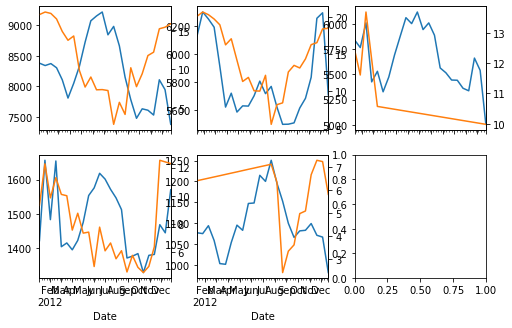

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

data.groupby("Region").resample("15D").mean()["TotalDemand"]["NSW"]["2012"].plot(ax=axes[0,0])
data.groupby("Region").resample("15D").mean()["DewTemperature"]["NSW"]["2012"].plot(ax=axes[0,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["QLD"]["2012"].plot(ax=axes[0,1])
data.groupby("Region").resample("15D").mean()["DewTemperature"]["QLD"]["2012"].plot(ax=axes[0,1], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["VIC"]["2012"].plot(ax=axes[0,2])
data.groupby("Region").resample("15D").mean()["DewTemperature"]["VIC"]["2012"].plot(ax=axes[0,2], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["SA"]["2012"].plot(ax=axes[1,0])
data.groupby("Region").resample("15D").mean()["DewTemperature"]["SA"]["2012"].plot(ax=axes[1,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["TAS"]["2012"].plot(ax=axes[1,1])
data.groupby("Region").resample("15D").mean()["DewTemperature"]["TAS"]["2012"].plot(ax=axes[1,1], secondary_y=True)

This graph shows that the total demand vs the relative humidity in 2011.
The total demands are blue lines, and the relative humidities are yellow lines. 
As can be seen from the graph, the volatility of relative humidity throughout the year is very obvious, reaching the peak between may and August.
Total demand will increase with the rise of relative humidity, which is in positive proportion.

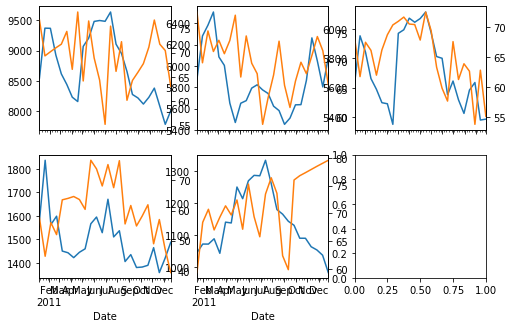

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

data.groupby("Region").resample("15D").mean()["TotalDemand"]["NSW"]["2011"].plot(ax=axes[0,0])
data.groupby("Region").resample("15D").mean()["RelativeHumidity"]["NSW"]["2011"].plot(ax=axes[0,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["QLD"]["2011"].plot(ax=axes[0,1])
data.groupby("Region").resample("15D").mean()["RelativeHumidity"]["QLD"]["2011"].plot(ax=axes[0,1], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["VIC"]["2011"].plot(ax=axes[0,2])
data.groupby("Region").resample("15D").mean()["RelativeHumidity"]["VIC"]["2011"].plot(ax=axes[0,2], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["SA"]["2011"].plot(ax=axes[1,0])
data.groupby("Region").resample("15D").mean()["RelativeHumidity"]["SA"]["2011"].plot(ax=axes[1,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["TAS"]["2011"].plot(ax=axes[1,1])
data.groupby("Region").resample("15D").mean()["RelativeHumidity"]["TAS"]["2011"].plot(ax=axes[1,1], secondary_y=True)

This graph shows that the total demand vs the relative humidity in 2012.
The total demands are blue lines, and the precipitations are yellow lines.
From the perspective of the whole year, the variation in precipitation values is obvious.
Precipitation is concentrated from April to September.
Total demand increases in proportion to the increase in Precipitation.

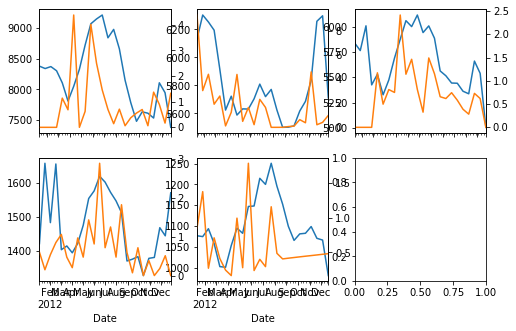

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

data.groupby("Region").resample("15D").mean()["TotalDemand"]["NSW"]["2012"].plot(ax=axes[0,0])
data.groupby("Region").resample("15D").mean()["Precipitation"]["NSW"]["2012"].plot(ax=axes[0,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["QLD"]["2012"].plot(ax=axes[0,1])
data.groupby("Region").resample("15D").mean()["Precipitation"]["QLD"]["2012"].plot(ax=axes[0,1], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["VIC"]["2012"].plot(ax=axes[0,2])
data.groupby("Region").resample("15D").mean()["Precipitation"]["VIC"]["2012"].plot(ax=axes[0,2], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["SA"]["2012"].plot(ax=axes[1,0])
data.groupby("Region").resample("15D").mean()["Precipitation"]["SA"]["2012"].plot(ax=axes[1,0], secondary_y=True)
data.groupby("Region").resample("15D").mean()["TotalDemand"]["TAS"]["2012"].plot(ax=axes[1,1])
data.groupby("Region").resample("15D").mean()["Precipitation"]["TAS"]["2012"].plot(ax=axes[1,1], secondary_y=True)